In [1]:
# 01_project_setup_and_eda
'''Project setup and exploratory data analysis.'''

'Project setup and exploratory data analysis.'

In [14]:
# Cell 2: environment & imports
import warnings
warnings.filterwarnings("ignore")   # suppress common non-actionable warnings

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,4)
RANDOM_STATE = 42

# Detect CSV (root or data/)
CANDIDATES = [Path("C:/Users/KIIT/OneDrive/Documents/Labmentix/netflix/data/raw//NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"),
              Path("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")]
DATA_PATH = next((p for p in CANDIDATES if p.exists()), None)
assert DATA_PATH is not None, "Place 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' in repo root or in data/."
print("Using dataset:", DATA_PATH)


Using dataset: C:\Users\KIIT\OneDrive\Documents\Labmentix\netflix\data\raw\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [15]:
# Cell 3: load and preview
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head(8))


Shape: (7787, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...


In [4]:
# Cell 4: missingness and dtypes
missing = df.isnull().sum().sort_values(ascending=False)
print("Top missing counts:\n", missing.head(15).to_string())
print("\nDtypes:")
print(df.dtypes)


Top missing counts:
 director        2389
cast             718
country          507
date_added        10
rating             7
title              0
show_id            0
type               0
release_year       0
duration           0
listed_in          0
description        0

Dtypes:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


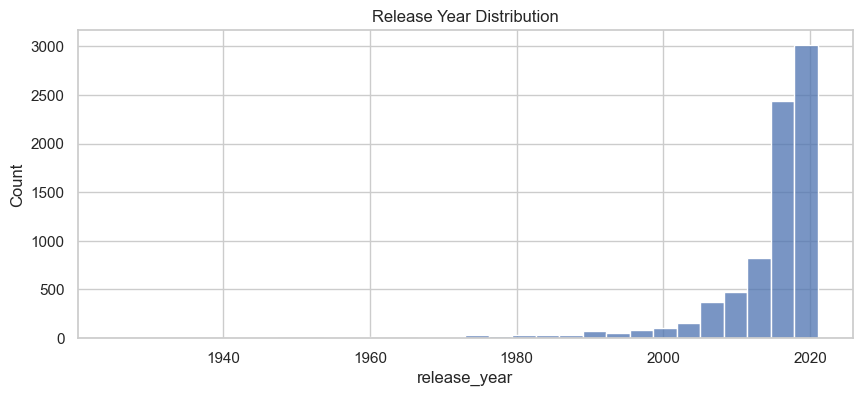


Type counts:


type
Movie      5377
TV Show    2410
Name: count, dtype: int64


Rating counts:


rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [5]:
# Cell 5: distributions
if 'release_year' in df.columns:
    yrs = pd.to_numeric(df['release_year'], errors='coerce').dropna().astype(int)
    sns.histplot(yrs, bins=30)
    plt.title("Release Year Distribution")
    plt.show()

if 'type' in df.columns:
    print("\nType counts:")
    display(df['type'].value_counts().head(20))

if 'rating' in df.columns:
    print("\nRating counts:")
    display(df['rating'].value_counts().head(20))


listed_in
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    491
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             232
Reality TV                   222
Sci-Fi & Fantasy             218
Sports Movies                196
Korean TV Shows              150
TV Action & Adventure        150
Name: count, dtype: int64

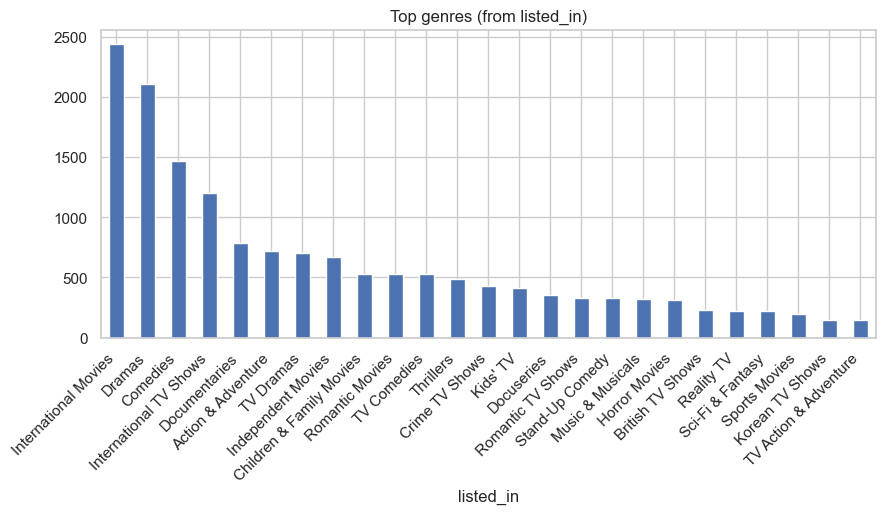

In [6]:
# Cell 6: top genres from listed_in (if present)
if 'listed_in' in df.columns:
    genres = df['listed_in'].fillna('').str.split(',').explode().str.strip()
    top_genres = genres.value_counts().head(25)
    display(top_genres)
    top_genres.plot(kind='bar', figsize=(10,4))
    plt.title("Top genres (from listed_in)")
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No 'listed_in' column found.")


In [12]:
#Observations / Next steps
print("- Note columns with many missing values (see missing counts).")
print("- We'll parse `listed_in` into a `genres_list` for multi-hot encoding.")
print("- We'll use `description` for TF-IDF text features and `duration`/`release_year` as numeric features where available.")
print("- Proceed to 02_data_cleaning_and_preprocessing.ipynb next.")


- Note columns with many missing values (see missing counts).
- We'll parse `listed_in` into a `genres_list` for multi-hot encoding.
- We'll use `description` for TF-IDF text features and `duration`/`release_year` as numeric features where available.
- Proceed to 02_data_cleaning_and_preprocessing.ipynb next.
